In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import cv2

In [3]:
import matplotlib.pyplot as plt

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

이미지 파일 경로, 각 이미지 파일의 이름을 얻기 위한 작업

In [4]:
adenocarcinoma_test_file_path = '/content/drive/MyDrive/Data/test/adenocarcinoma'
adenocarcinoma_train_file_path = '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
adenocarcinoma_valid_file_path = '/content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'

largecell_test_file_path = '/content/drive/MyDrive/Data/test/large.cell.carcinoma'
largecell_train_file_path = '/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
largecell_valid_file_path = '/content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'

normal_test_file_path = '/content/drive/MyDrive/Data/test/normal'
normal_train_file_path = '/content/drive/MyDrive/Data/train/normal'
normal_valid_file_path = '/content/drive/MyDrive/Data/valid/normal'

squamous_test_file_path = '/content/drive/MyDrive/Data/test/squamous.cell.carcinoma'
squamous_train_file_path = '/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
squamous_valid_file_path = '/content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'

In [5]:
adenocarcinoma_test_image_list = os.listdir(adenocarcinoma_test_file_path)
adenocarcinoma_train_image_list = os.listdir(adenocarcinoma_train_file_path)
adenocarcinoma_valid_image_list = os.listdir(adenocarcinoma_valid_file_path)

largecell_test_image_list = os.listdir(largecell_test_file_path)
largecell_train_image_list = os.listdir(largecell_train_file_path)
largecell_valid_image_list = os.listdir(largecell_valid_file_path)

normal_test_image_list = os.listdir(normal_test_file_path)
normal_train_image_list = os.listdir(normal_train_file_path)
normal_valid_image_list = os.listdir(normal_valid_file_path)

squamous_test_image_list = os.listdir(squamous_test_file_path)
squamous_train_image_list = os.listdir(squamous_train_file_path)
squamous_valid_image_list = os.listdir(squamous_valid_file_path)

각 이미지 파일에 경로 추가 작업

In [6]:
adenocarcinoma_test_image_path_list = []
for i in adenocarcinoma_test_image_list:
  adenocarcinoma_test_image_path_list.append(adenocarcinoma_test_file_path + '/' + i)


두 작업의 함수화


In [7]:
def image_processing(file_path):
  image_name_list = os.listdir(file_path)
  image_path_list = []
  for i in image_name_list:
    image_path_list.append(file_path + '/' + i)
  
  image_list = []
  for j in image_path_list:
    image_list.append(cv2.imread(j, cv2.IMREAD_COLOR))
  
  return image_list

In [8]:
adenocarcinoma_test_image_list = image_processing('/content/drive/MyDrive/Data/test/adenocarcinoma')
adenocarcinoma_train_image_list = image_processing('/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')
adenocarcinoma_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')

largecell_test_image_list = image_processing('/content/drive/MyDrive/Data/test/large.cell.carcinoma')
largecell_train_image_list = image_processing('/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')
largecell_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')

normal_test_image_list = image_processing('/content/drive/MyDrive/Data/test/normal')
normal_train_image_list = image_processing('/content/drive/MyDrive/Data/train/normal')
normal_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/normal')

squamous_test_image_list = image_processing('/content/drive/MyDrive/Data/test/squamous.cell.carcinoma')
squamous_train_image_list = image_processing('/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')
squamous_valid_image_list = image_processing('/content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa')

모든 이미지들을 담고 있는 리스트 생성

In [9]:
data = adenocarcinoma_test_image_list + adenocarcinoma_train_image_list + adenocarcinoma_valid_image_list + largecell_test_image_list + largecell_train_image_list + largecell_valid_image_list +  normal_test_image_list + normal_train_image_list + normal_valid_image_list + squamous_test_image_list + squamous_train_image_list + squamous_valid_image_list

In [10]:
len(data)

1000

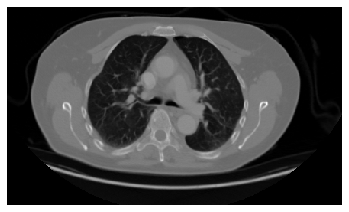

(260, 439, 3)


In [11]:
plot_image(adenocarcinoma_test_image_list[1])
plt.show()
print(adenocarcinoma_test_image_list[1].shape)

함수 생성

In [12]:
def biggest_image(image_list):
  height = int(image_list[0].shape[0])
  width = int(image_list[0].shape[1])

  for i in image_list:
    image_height = int(i.shape[0])
    image_width = int(i.shape[1])
    if height < image_height:
      height = image_height
    if width < image_width:
      width = image_width
    
    print(height, width)

  return height, width

In [13]:
def compare_hw(h,w,image):
  h_2, w_2 = biggest_image(image)

  if h_2 > h:
    h = h_2

  if w_2 > w:
    w = w_2

  return w, h


In [14]:
height, width = biggest_image(data)
print(height, width)

320 444
320 444
320 444
320 444
340 485
357 485
406 485
406 485
406 486
406 486
406 486
409 486
413 487
413 487
413 487
413 487
413 487
413 487
413 487
413 487
413 487
413 487
413 487
413 487
413 487
430 487
430 487
430 487
430 487
430 487
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 498
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506
430 506


이미지 변환

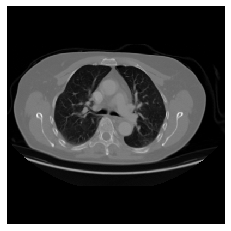

In [15]:
import tensorflow as tf
import torch

a = tf.image.resize_with_crop_or_pad(adenocarcinoma_test_image_list[1],400, 400)

plot_image(a)
plt.show()

In [16]:
height, width

(874, 1200)

In [17]:
image_data = []

for i in data:
  image_data.append(tf.image.resize_with_crop_or_pad(i,height, width))

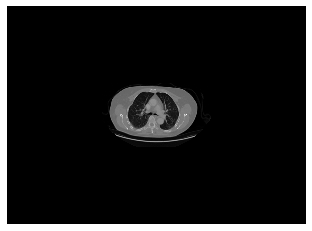

In [18]:
plot_image(image_data[1])
plt.show()

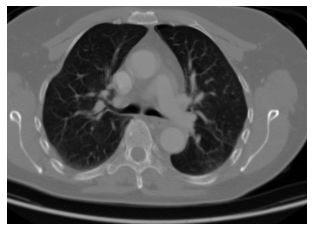

In [19]:
a = tf.image.resize_with_crop_or_pad(image_data[1],height//4, width//4)

plot_image(a)
plt.show()

In [20]:
image_data[0].shape

TensorShape([874, 1200, 3])

이미지 변환 함수 생성

In [21]:
def transpose_image(w, h, data):
  image_data = []

  for i in data:
    image_data.append(tf.image.resize_with_crop_or_pad(i,height, width))

  return image_data

In [22]:
adenocarcinoma_train_ts_image = transpose_image(width, height, adenocarcinoma_train_image_list)
adenocarcinoma_test_ts_image = transpose_image(width, height, adenocarcinoma_test_image_list)

normal_train_ts_image = transpose_image(width, height, normal_train_image_list)
normal_test_ts_image = transpose_image(width, height, normal_test_image_list)

In [23]:
print(len(adenocarcinoma_test_ts_image), len(normal_test_ts_image), len(adenocarcinoma_train_ts_image), len(normal_train_ts_image))

120 54 195 148


In [24]:
from tensorflow import keras

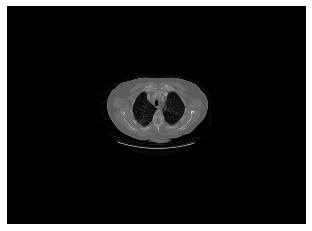

In [25]:
plot_image(adenocarcinoma_test_ts_image[0])
plt.show()

In [26]:
adenocarcinoma_test_ts_image[0].shape

TensorShape([874, 1200, 3])

In [27]:
len(adenocarcinoma_train_ts_image)

195

In [28]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

train_target = np.zeros(len(adenocarcinoma_train_ts_image) + len(normal_train_ts_image))
test_target = np.zeros(len(adenocarcinoma_test_ts_image) + len(normal_test_ts_image))

train_data = adenocarcinoma_train_ts_image + normal_train_ts_image
test_data = adenocarcinoma_test_ts_image + normal_test_ts_image

In [29]:
train_scaled = np.array(train_data).reshape(-1, height, width, 3)

In [30]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape = (height, width,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 874, 1200, 32)     896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 437, 600, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 437, 600, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 218, 300, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4185600)           0         
                                                                 
 dense (Dense)               (None, 100)               4

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [33]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(8, kernel_size=3, activation='relu', padding='same', input_shape = (height, width,3)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(20, activation='relu'))
model2.add(keras.layers.Dropout(0.4))
model2.add(keras.layers.Dense(1))

In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 874, 1200, 8)      224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 437, 600, 8)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 437, 600, 16)      1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 218, 300, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1046400)           0         
                                                                 
 dense_2 (Dense)             (None, 20)               

In [35]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
#history = model.fit(train_scaled, train_target, epochs=10, callbacks=[checkpoint_cb, early_stopping_cb])

In [37]:
history = model2.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
11/11 [==============================] - 14s 422ms/step - loss: 0.0000e+00 - accuracy: 0.1399
Epoch 2/10
11/11 [==============================] - 3s 260ms/step - loss: 0.0000e+00 - accuracy: 0.1399
Epoch 3/10
11/11 [==============================] - 3s 258ms/step - loss: 0.0000e+00 - accuracy: 0.1108
Epoch 4/10
11/11 [==============================] - 3s 258ms/step - loss: 0.0000e+00 - accuracy: 0.1370
Epoch 5/10
11/11 [==============================] - 3s 260ms/step - loss: 0.0000e+00 - accuracy: 0.1749
Epoch 6/10
11/11 [==============================] - 3s 260ms/step - loss: 0.0000e+00 - accuracy: 0.1137
Epoch 7/10
11/11 [==============================] - 3s 261ms/step - loss: 0.0000e+00 - accuracy: 0.1195
Epoch 8/10
11/11 [==============================] - 3s 257ms/step - loss: 0.0000e+00 - accuracy: 0.1545
Epoch 9/10
11/11 [==============================] - 3s 260ms/step - loss: 0.0000e+00 - accuracy: 0.1224
Epoch 10/10
11/11 [==============================] - 3s 258ms/s

In [38]:
test_scaled = np.array(test_data).reshape(-1, height, width, 3)

In [39]:
model2.evaluate(test_scaled, test_target)

6/6 [==============================] - 1s 183ms/step - loss: 0.0000e+00 - accuracy: 0.0057


[0.0, 0.005747126415371895]